In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
suicides = pd.read_csv ('master.csv')

In [3]:
suicides.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [4]:
suicides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
suicides.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [6]:
#найдем максимальное количество суицидов за период 
print (max(suicides['suicides_no']))

22338


In [7]:
# посмотрим, какая это страна
suicides[suicides['suicides_no'] == 22338]

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
20996,Russian Federation,1994,male,35-54 years,22338,19044200,117.3,Russian Federation1994,NaN,"395,077,301,248",2853,Boomers


In [8]:
#в столбце HDI for year слишком много пропусков.Удаляем
suicides.drop(['HDI for year'], axis=1, inplace = True)

In [9]:
suicides.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


In [10]:
#увеличим размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [11]:
#посмотрим, сколько у нас в таблице стран
len(suicides.country.unique())

101

In [12]:
#посмотрим динамику суицидов по годам суммарно по всем странам
suicides_by_year = suicides[['year', 'suicides_no']].groupby ('year').sum().reset_index()

In [13]:
suicides_by_year.head()

,year,suicides_no
0,1985,116063
1,1986,120670
2,1987,126842
3,1988,121026
4,1989,160244


Text(0, 0.5, 'Количество суицидов в мире')

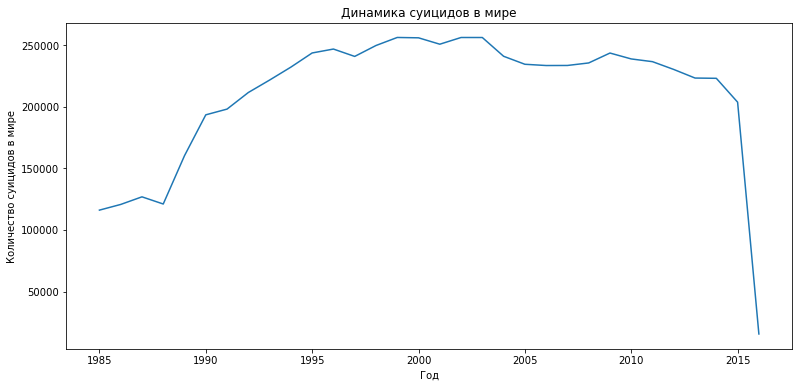

In [14]:
#проследим динамику общего количества суицидов в мире по годам 
plt.plot(suicides_by_year.year, suicides_by_year.suicides_no)
plt.title('Динамика суицидов в мире')
plt.xlabel('Год')
plt.ylabel('Количество суицидов в мире')
#в целом количество суицидов в мире начало значительно расти с 1989 года

In [15]:
suicides.sex.unique()

array(['male', 'female'], dtype=object)

In [16]:
#посмотрим, кто больше предпринимает суицидальных попыток
suicides_by_sex = suicides[['sex', 'suicides_no']].groupby ('sex').sum()

In [17]:
suicides_by_sex.head()

,suicides_no
sex,
female,1559510
male,5188910


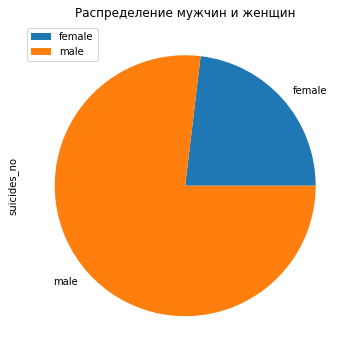

In [18]:
ax = suicides_by_sex.suicides_no.plot(kind = 'pie', title = 'Распределение мужчин и женщин')
ax.legend()
# мужчины в три раза чаще предпринимают попытки суицида чем женщины

In [19]:
suicides.age.unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [20]:
#какая возрастная группа совершает больше всего попыток суицида
suicides_by_age = suicides[['age', 'suicides_no']].groupby('age').sum()

In [21]:
suicides_by_age

,suicides_no
age,
15-24 years,808542
25-34 years,1123912
35-54 years,2452141
5-14 years,52264
55-74 years,1658443
75+ years,653118


<AxesSubplot:title={'center':'Распределение суициальных попыток по возрастам'}, xlabel='age', ylabel='suicides_no'>

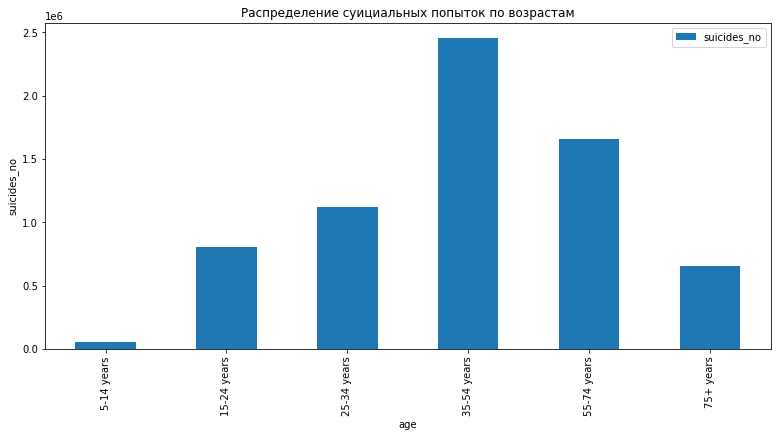

In [22]:
suicides_by_age.loc[['5-14 years', '15-24 years','25-34 years','35-54 years', '55-74 years','75+ years']].plot(kind = 'bar', title = 'Распределение суициальных попыток по возрастам', xlabel = 'age', ylabel = 'suicides_no')
# больше всего суицидальных попыток предпринимают люди в возрастной категории от 35 до 54 лет

In [23]:
#посмотрим, какие у нас страны в датасете
suicides.country.unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [24]:
#отфильтруем Россию
filtered_Russia = suicides[(suicides['country'] == 'Russian Federation')]

In [25]:
filtered_Russia.country.unique()

array(['Russian Federation'], dtype=object)

In [26]:
filtered_Russia.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
20936,Russian Federation,1989,male,75+ years,1393,1349100,103.25,Russian Federation1989,"506,500,173,960",3740,G.I. Generation
20937,Russian Federation,1989,male,35-54 years,12030,18058500,66.62,Russian Federation1989,"506,500,173,960",3740,Silent
20938,Russian Federation,1989,male,55-74 years,6250,9383700,66.60,Russian Federation1989,"506,500,173,960",3740,G.I. Generation
20939,Russian Federation,1989,male,25-34 years,6856,12748800,53.78,Russian Federation1989,"506,500,173,960",3740,Boomers
20940,Russian Federation,1989,female,75+ years,1677,4738100,35.39,Russian Federation1989,"506,500,173,960",3740,G.I. Generation


In [27]:
#сгруппируем суициды в России по годам
suicides_Russia = filtered_Russia[['year', 'suicides_no']].groupby ('year').sum().reset_index()

In [28]:
suicides_Russia.head()

,year,suicides_no
0,1989,37921
1,1990,39028
2,1991,39281
3,1992,45923
4,1993,55846


In [65]:
#отфильтруем США
filtered_USA = suicides[(suicides['country'] == 'United States')]
filtered_USA.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
26848,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,"4,346,734,000,000",19693,G.I. Generation
26849,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,"4,346,734,000,000",19693,G.I. Generation
26850,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,"4,346,734,000,000",19693,Boomers
26851,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,"4,346,734,000,000",19693,Silent
26852,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,"4,346,734,000,000",19693,Generation X


In [30]:
#сгруппируем суициды в США по годам
suicides_USA = filtered_USA[['year', 'suicides_no']].groupby ('year').sum().reset_index()

In [31]:
suicides_USA.head()

,year,suicides_no
0,1985,29446
1,1986,30892
2,1987,30783
3,1988,30388
4,1989,30218


In [32]:
#отфильтруем Германию
filtered_Germany = suicides[(suicides['country'] == 'Germany')]

In [33]:
#Сгруппируем суициды в Германии по годам
suicides_Germany = filtered_Germany[['year', 'suicides_no']].groupby ('year').sum().reset_index()

In [34]:
suicides_Germany.head()

,year,suicides_no
0,1990,13924
1,1991,14010
2,1992,13458
3,1993,12690
4,1994,12718


In [71]:
#склеим таблицы
grouped_three = pd.concat([filtered_Russia, filtered_USA,filtered_Germany])
grouped_three.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
20936,Russian Federation,1989,male,75+ years,1393,1349100,103.25,Russian Federation1989,"506,500,173,960",3740,G.I. Generation
20937,Russian Federation,1989,male,35-54 years,12030,18058500,66.62,Russian Federation1989,"506,500,173,960",3740,Silent
20938,Russian Federation,1989,male,55-74 years,6250,9383700,66.60,Russian Federation1989,"506,500,173,960",3740,G.I. Generation
20939,Russian Federation,1989,male,25-34 years,6856,12748800,53.78,Russian Federation1989,"506,500,173,960",3740,Boomers
20940,Russian Federation,1989,female,75+ years,1677,4738100,35.39,Russian Federation1989,"506,500,173,960",3740,G.I. Generation


In [72]:
grouped_three.country.unique()

array(['Russian Federation', 'United States', 'Germany'], dtype=object)

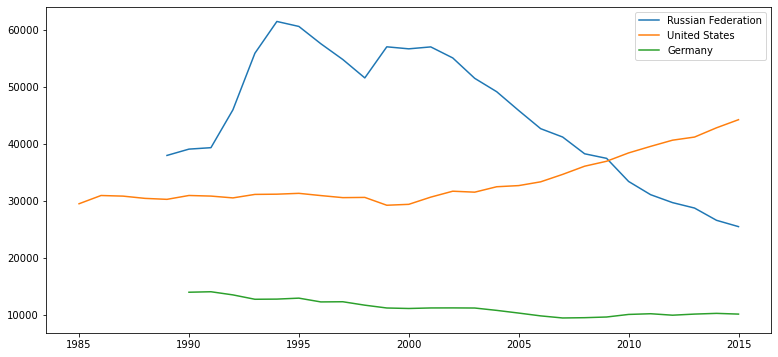

In [73]:
#Посмотрим динамику суицидов в России, США и Германии 
plt.plot(suicides_Russia.year, suicides_Russia.suicides_no)
plt.plot(suicides_USA.year, suicides_USA.suicides_no)
plt.plot(suicides_Germany.year, suicides_Germany.suicides_no)
plt.legend(grouped_three.country.unique())

In [36]:
suicides_by_countries = suicides[['country', 'year', 'suicides_no']]

In [37]:
suicides_by_countries.groupby(['country','year']).sum()


suicides_no
country    year             
Albania    1987           73
           1988           63
           1989           68
           1992           47
           1993           73
...                      ...
Uzbekistan 2010         1464
           2011         1640
           2012         1835
           2013         1950
           2014         2095

[2321 rows x 1 columns]

In [38]:
pivot_suicides = suicides_by_countries.pivot_table(index = 'year', columns = 'country', values = 'suicides_no', aggfunc = 'sum').reset_index()

In [39]:
pivot_suicides

country,year,Albania,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,...,Thailand,Trinidad and Tobago,Turkey,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan
0,1985,NaN,0.0,1988.0,NaN,NaN,1861.0,2091.0,NaN,1.0,...,2982.0,29.0,NaN,NaN,NaN,NaN,5105.0,29446.0,287.0,NaN
1,1986,NaN,0.0,2284.0,NaN,NaN,2044.0,2139.0,NaN,NaN,...,2798.0,104.0,NaN,NaN,NaN,NaN,4839.0,30892.0,262.0,NaN
2,1987,73.0,0.0,2286.0,NaN,NaN,2164.0,2069.0,NaN,3.0,...,3035.0,119.0,NaN,272.0,10050.0,NaN,4594.0,30783.0,258.0,NaN
3,1988,63.0,0.0,2354.0,NaN,NaN,2172.0,1851.0,NaN,NaN,...,NaN,164.0,NaN,270.0,9751.0,NaN,4971.0,30388.0,268.0,NaN
4,1989,68.0,0.0,2247.0,NaN,NaN,2066.0,1898.0,NaN,NaN,...,NaN,173.0,NaN,253.0,10887.0,NaN,4361.0,30218.0,344.0,NaN
5,1990,NaN,1.0,2140.0,93.0,NaN,2202.0,1825.0,114.0,NaN,...,3753.0,170.0,NaN,298.0,10645.0,NaN,4643.0,30895.0,315.0,1459.0
6,1991,NaN,0.0,1951.0,80.0,NaN,2288.0,1769.0,134.0,NaN,...,3559.0,148.0,NaN,273.0,10700.0,NaN,4547.0,30790.0,NaN,1393.0
7,1992,47.0,0.0,2184.0,83.0,NaN,2251.0,1759.0,144.0,NaN,...,3550.0,163.0,NaN,271.0,11666.0,NaN,4628.0,30471.0,NaN,1344.0
8,1993,73.0,1.0,2230.0,106.0,NaN,2038.0,1704.0,119.0,7.0,...,NaN,174.0,NaN,240.0,12469.0,NaN,4462.0,31084.0,418.0,1355.0
9,1994,50.0,0.0,2241.0,112.0,NaN,2283.0,1776.0,47.0,3.0,...,2307.0,148.0,NaN,234.0,13826.0,NaN,4380.0,31123.0,406.0,1419.0


Text(0, 0.5, 'количество суицидов')

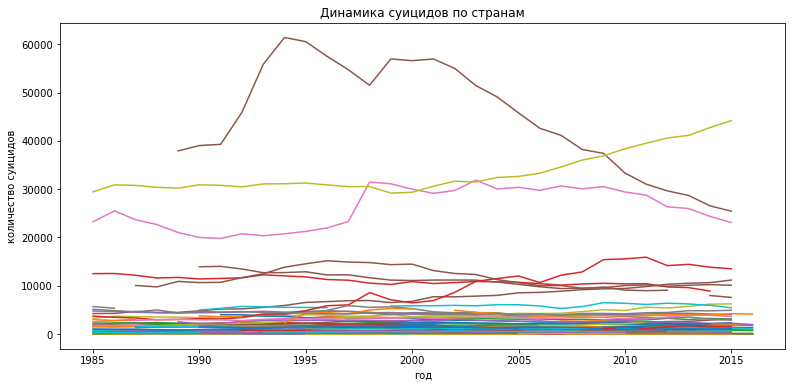

In [40]:
for country in [x for x in pivot_suicides.columns if 'year' not in x]:
    plt.plot(pivot_suicides.year, pivot_suicides[country])
plt.title('Динамика суицидов по странам')
plt.xlabel('год')
plt.ylabel('количество суицидов')

In [41]:
suicides_in_countries = suicides[['country', 'suicides_no']]

In [42]:
suicides_in_countries.head()

,country,suicides_no
0,Albania,21
1,Albania,16
2,Albania,14
3,Albania,1
4,Albania,9


In [43]:
leaders = suicides_in_countries.groupby('country').sum().reset_index()

In [44]:
leaders.sort_values('suicides_no', ascending = False).head()

,country,suicides_no
75,Russian Federation,1209742
98,United States,1034013
46,Japan,806902
33,France,329127
95,Ukraine,319950


<AxesSubplot:title={'center':'Распределение количества суицидов'}>

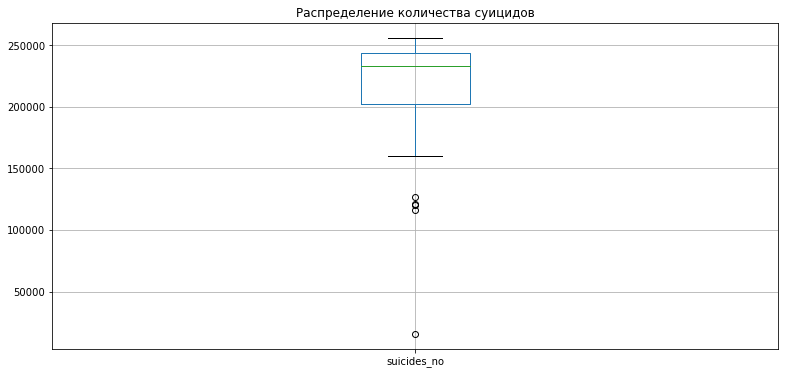

In [86]:
#посмотрим выбросы
suicides_by_year.suicides_no.plot(kind = 'box', title = 'Распределение количества суицидов по годам', grid = True)
#в таблице есть год, в который во всем мире происходило мало суицидов. Но скорее всего просто не хватает данных, поэтому можно этот год удалить 

In [87]:
#посмотрим, какой это год
suicides_by_year[suicides_by_year.suicides_no < 50000].head()

,year,suicides_no
31,2016,15603


In [82]:
import seaborn as sns

Text(0.5, 1.0, 'Корреляция между количеством самоубийств и ВВП на душу населения')

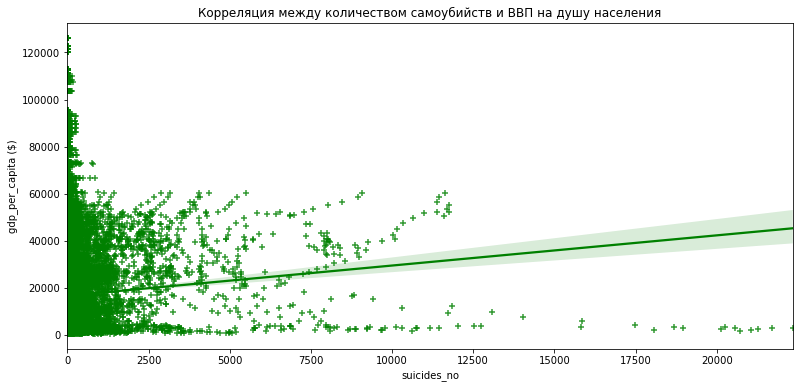

In [84]:
#посмотрим заивисмость количества самоубийств от ВВП на душу населения
ax = sns.regplot(data= suicides, x='suicides_no', y='gdp_per_capita ($)', color='green', marker='+')
ax.set_title('Корреляция между количеством самоубийств и ВВП на душу населения')
#чем ниже ВВП на душу населения, тем больше происходит в стране самоубийств

In [77]:
correlation.head()

,year,suicides_no,gdp_per_capita ($)
0,1985.0,116063.0,796
1,1986.0,120670.0,796
2,1987.0,126842.0,796
3,1988.0,121026.0,796
4,1989.0,160244.0,796
